# Dot Plots
## a generic and basic example
create a matrix with each sequence as an axis
place a 0 if there is a mismatch between the two sequences at that position
place a 1 if there is a match
visualize matrix by coloring a grid according to 1's or 0's
here 1's are yellow, 0's are purple

g
a
t
a
a
a


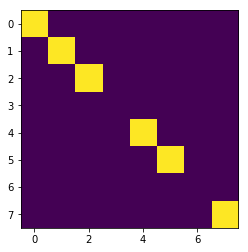

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sequence_1 = 'gatcaaaa'
sequence_2 = 'gatgaata'
dot_matrix = np.zeros((len(sequence_1),len(sequence_2)))
for base in range(0,len(sequence_1)):
    if sequence_1[base] == sequence_2[base]:
        print sequence_1[base]
        dot_matrix[base,base] = 1
plt.imshow(dot_matrix)        
plt.show()